In [1]:
import numpy as np
import numpy.ma as ma

import matplotlib.pyplot as plt

import csv

from astropy.io import ascii
from astropy.table import Table, QTable

import scipy.stats as stats

In [2]:
MANGA_FOLDER = '/Users/richardzhang/Documents/UR_Stuff/Research_UR/SDSS/dr16/manga/spectro/'

DRP_FILENAME = MANGA_FOLDER + 'redux/v3_1_1/drpall-v3_1_1.fits'

SMOOTHNESS_MORPH_FOLDER = '/Users/richardzhang/Documents/UR_Stuff/Research_UR/RotationCurve/2D_RC/main/'

smoothness_morph_file = SMOOTHNESS_MORPH_FOLDER + 'cross_table.csv'

In [3]:
cross_match_table = Table.read(smoothness_morph_file,format='ascii.commented_header')

In [4]:
smoothness_list = list(cross_match_table['smoothness'])

In [5]:
np.save(list(cross_match_table['smoothness']),'smoothness_all_gal')

TypeError: expected str, bytes or os.PathLike object, not list

In [6]:
smoothness = cross_match_table['smoothness'].data

(array([  2.,   4.,   3.,  13.,  15.,  34.,  41.,  34.,  62.,  61.,  83.,
         66.,  81.,  94.,  94.,  90., 112., 109.,  88.,  86.,  94.,  83.,
        104., 104., 107.,  81.,  88.,  95.,  78.,  94.,  91.,  99.,  99.,
        100.,  94.,  97.,  95.,  90.,  95.,  96.,  97.,  97.,  94., 120.,
         90., 108.,  96., 104.,  99.,  93.,  87., 101., 101.,  95.,  97.,
         95.,  86.,  91., 100., 110.,  88., 106.,  79.,  99.,  83.,  68.,
         88.,  78.,  71.,  76.,  75.,  67.,  54.,  73.,  71.,  66.,  67.,
         74.,  46.,  48.,  56.,  58.,  56.,  42.,  61.,  49.,  47.,  54.,
         38.,  51.,  56.,  60.,  54.,  57.,  49.,  63.,  43.,  58.,  67.,
         56.,  62.,  64.,  84.,  86.,  94.,  98.,  88.,  92., 122., 114.,
        126., 119., 111., 111., 117., 126.,  98., 103.,  73.,  85.,  63.,
         65.,  54.,  60.,  52.,  40.,  41.,  29.,  36.,  26.,  31.,  15.,
         16.,  16.,  16.,  15.,  13.,  12.,   7.,   6.,  10.,   5.,   8.,
          5.,   1.,   4.,   5.,   5., 

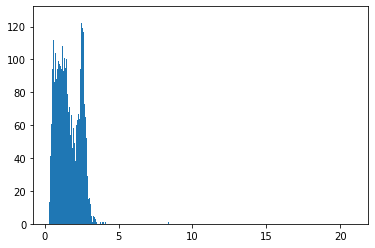

In [7]:
plt.hist(smoothness,bins=1000)

In [8]:
ttype = cross_match_table['DL_ttype'].data
ttype

array([ 6.56464195,  4.73092127,  4.75650787, ...,  3.42870998,
       -0.92551315,  6.99700069])

In [9]:
gal_ID_cross = cross_match_table['galaxy_ID'].data
type(gal_ID_cross[0])

numpy.str_

In [10]:
pltg = cross_match_table['DL_PLTG'].data

Text(0.5, 1.0, 'smoothness vs ttype')

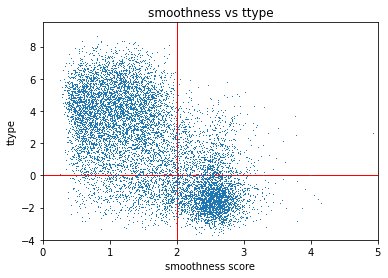

In [39]:
plt.plot(smoothness,ttype,',')
plt.vlines(2,ymin=-4,ymax=9.5,color='r',linewidth=1)
plt.hlines(0,xmin=0,xmax=5,color='r',linewidth=1)
plt.xlabel('smoothness score')
plt.ylabel('ttype')
plt.xlim(0,5)
plt.ylim(-4,9.5)
plt.title('smoothness vs ttype')

Text(0.5, 1.0, 'smoothness vs ttype')

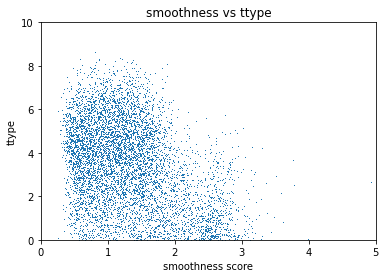

In [18]:
plt.plot(smoothness,ttype,',')
plt.xlabel('smoothness score')
plt.ylabel('ttype')
plt.ylim(0,10)
plt.xlim(0,5)
plt.title('smoothness vs ttype')

In [20]:
gal = []
for i in range(0,len(ttype)):
    if smoothness[i] <= 2 and ttype[i] > 0:
        gal.append(cross_match_table['galaxy_ID'][i])

In [22]:
len(gal)

5748

Text(0.5, 1.0, 'smoothness vs ttype')

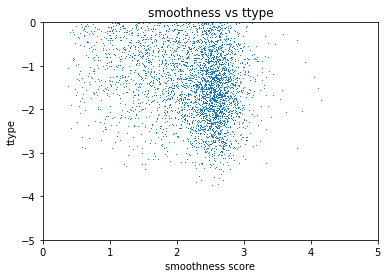

In [11]:
plt.plot(smoothness,ttype,',')
plt.xlabel('smoothness score')
plt.ylabel('ttype')
plt.ylim(-5,0);plt.xlim(0,5)
plt.title('smoothness vs ttype')

Text(0.5, 1.0, 'smoothness vs probability of being LTG')

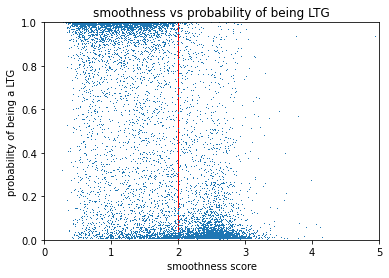

In [41]:
plt.plot(smoothness,pltg,',')
plt.vlines(2,ymin=0,ymax=1,color='r',linewidth=1)
plt.xlabel('smoothness score')
plt.ylabel('probability of being a LTG')
plt.xlim(0,5)
plt.ylim(0,1)
plt.title('smoothness vs probability of being LTG')

In [17]:
vc = cross_match_table['DL_Visual_Class'].data

Text(0.5, 1.0, 'smoothness vs probability of being LTG')

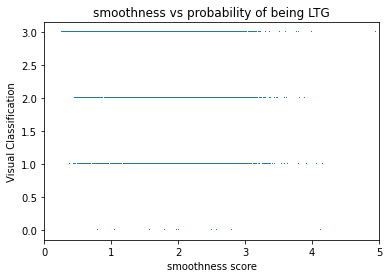

In [19]:
plt.plot(smoothness,vc,',')
plt.xlabel('smoothness score')
plt.ylabel('Visual Classification')
plt.xlim(0,5)
plt.title('smoothness vs probability of being LTG')

In [13]:
big_file = SMOOTHNESS_MORPH_FOLDER + 'DRP-master_file_vflag_BB_smooth1p85_mapFit_N2O2_HIdr2_morph_SK_H2_noWords_v6.txt'

In [14]:
BTable = ascii.read(big_file,'r')

In [15]:
BTable

MaNGA_plate,MaNGA_IFU,NSA_plate,NSA_fiberID,NSA_MJD,NSA_index,NSA_RA,NSA_DEC,NSA_ba,NSA_phi,NSA_redshift,NSA_Mstar,vflag,avg_v_max,avg_v_max_sigma,avg_alpha,avg_alpha_sigma,avg_chi_square_rot,pos_v_max,pos_v_max_sigma,pos_alpha,pos_alpha_sigma,pos_chi_square_rot,neg_v_max,neg_v_max_sigma,neg_alpha,neg_alpha_sigma,neg_chi_square_rot,center_flux,center_flux_error,Mtot,Mtot_error,Mdark,Mdark_error,Mstar,Mdark_Mstar_ratio,Mdark_Mstar_ratio_error,rabsmag,avg_r_turn,avg_r_turn_sigma,pos_r_turn,pos_r_turn_sigma,neg_r_turn,neg_r_turn_sigma,logNO,t3,BPT,curve_used,points_cut,avg_chi_square_ndf,pos_chi_square_ndf,neg_chi_square_ndf,index,Z12logOH,u_r,frac_masked_spaxels,Rmax,Mtot_Mstar_ratio,Mtot_Mstar_ratio_error,smoothness_score,pos_Vmax_data,avg_Vmax_data,neg_Vmax_data,ba_map,ba_err_map,phi_map,phi_err_map,Vsys_map,Vsys_err_map,x0_map,x0_err_map,y0_map,y0_err_map,Vmax_map,Vmax_err_map,alpha_map,alpha_err_map,Rturn_map,Rturn_err_map,M90_map,M90_err_map,Sigma_disk_map,Sigma_disk_err_map,Rdisk_map,Rdisk_err_map,M90_disk_map,M90_disk_err_map,DRP_map_smoothness,NSA_elpetro_th90,chi2_map,chi2_disk_map,logHI,WF50,WP20,CMD_class,map_fit_flag,Tidal,GZ_edge_on,GZ_bar,GZ_spiral,DL_ttype,DL_s0,DL_edge_on,DL_bar_GZ2,DL_bar_N10,DL_merge,map_frac_unmasked,SFR,sSFR,Rmax_map,NSA_elpetro_th50,sigma,SK,R50_kpc,R90_kpc,Mdyn50_SK,Mdyn90_SK,logH2,logH2_err,H2_source
int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
8466,6101,1438,139,53054,294037,168.094031,44.816037,0.600082,22.05481,0.122333,144223535104.0,-9.0,574.851228,9.095952,1.790377,0.232502,64.503453,979.037745,7.095,2.096576,0.197796,30.863089,167.60489,1.682931,100.0,115.955614,390.70777,0.083721,0.001636,4358832534297.054,63176227074.445984,4059002308232.0713,63176227074.445984,299830226064.98267,13.537669,0.210707,-22.167273,1.479126,0.169074,1.416535,0.205525,7.023474,0.063575,-99.0,-99.0,2.0,-99,4,16.125863,7.715772,97.676943,1238750,-99.0,2.5984,0.086904,19.558358,14.537669,0.210707,2.151208,1349.578883,740.527472,302.029387,0.999952,0.999936,0.003471,26.001037,92.462725,36.856978,37.0,9.879607,17.1558,5.620717,5099.999942,5894.975477,100.0,5618.087871,4.298395,5.535747,14.096375,7.297812,365.760469,32.171772,12.365004,1.48839,11.242332,11.632705,2.406567,11.610635,108.169113,130132720.80903,-99.0,-99.0,-99.0,3,-1.0,0,0.0,0.0,0.0,-2.226952,0.122485,0.02347,0.012207,0.160167,0.054506,0.326475,-0.610417,-12.068939,31.03222,3.403154,131.69784,13022344.024079,6.050919,20.644087,32977876038754.2,112511521275233.42,-99.0,-99.0,0
10001,12704,483,456,51924,59044,133.989967,57.677968,0.15,81.219269,0.014122,4286639360.0,2.0,131.010252,19.676026,2.898749,0.932001,10.56158,167.368197,55.379415,1.56035,0.73842,47.043998,114.38749,2.066568,11.18639,5.360848,33.663622,0.047506,0.001228,13105279432.977133,3936483090.937075,5510141659.441766,3936483090.937075,7595137773.535367,0.725483,0.51829,-18.730289,2.373752,0.442446,2.743623,0.810916,2.23385,0.079225,-99.0,-99.0,-99.0,0,0,0.812429,3.618769,2.589509,-1,-99.0,2.198468,0.255945,3.283952,1.725483,0.51829,1.438706,120.317073,117.879889,-6.000375,0.287421,0.997201,83.527984,2.036675,-5

In [16]:
BTable['MaNGA_']

KeyError: 'MaNGA_'

In [ ]:
DTable = Table.read(DRP_FILENAME)
DTable

In [ ]:
HI_list = np.zeros(len(DTable))
H2_list = np.zeros(len(DTable))
for i in range(len(DTable)):
    for j in range(len(BTable)):
        plateifu = DTable['plateifu'][i]
        plate, ifu = plateifu.split('-')
        plate = int(plate)
        ifu = int(ifu)
        if BTable['MaNGA_plate'][j] == plate and BTable['MaNGA_IFU'][j] == ifu:
            HI_list[i] = BTable['logHI'][j]
            H2_list[i] = BTable['logH2'][j]

In [ ]:
HI_list

In [ ]:
10**HI_list

In [ ]:
np.save('logHI',HI_list)

In [ ]:
H2_list

In [ ]:
np.save('logH2',H2_list)